In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

### Input - Output

In [4]:
time_vals       = np.loadtxt("1I_1O_disorder/time.csv")*1e9
time_vals       = np.delete(time_vals,-1)
dic_disorder    = {seed : pd.read_csv(f"1I_1O_disorder/data/Np=49_Nj=4_Ne=2_{seed}.csv") for seed in range(0,10)}

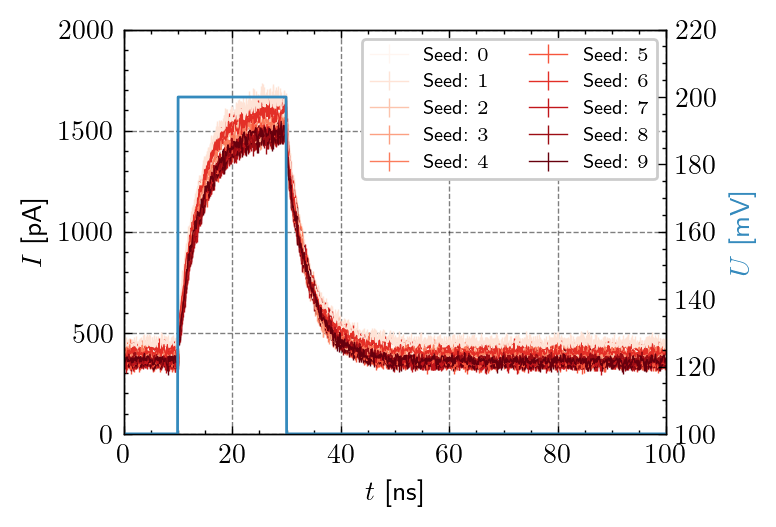

In [12]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, (key, df_base) in enumerate(dic_disorder.items()):
        ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(i/(len(dic_disorder.keys())-1)), label=f'Seed: ${key}$')
    ax.set_ylabel('$I$ [pA]')
    ax.set_xlabel('$t$ [ns]')
    ax.legend(fontsize='x-small', ncol=2)
    ax.set_xlim(0,100)
    ax.set_ylim(0,2000)
    # ax.set_yscale('log')

    ax2 = ax.twinx()
    ax2.plot(time_vals, df_base['E0']*1000, marker='', c=nanonets_utils.blue_color)
    ax2.set_ylabel('$U$ [mV]', c=nanonets_utils.blue_color)
    ax2.grid(False)
    ax2.set_ylim(100,220)